<a href="https://colab.research.google.com/github/ARKAL-J04/MachineLearning2025/blob/main/MP_0/AI_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D  # ÿ®ÿ±ÿß€å ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ÿ≥Ÿá‚Äåÿ®ÿπÿØ€å

#I

##ÿ¢

In [ ]:
#https://drive.google.com/file/d/1iMjo4Qa_JQUUcxmcdUV0dWRQWevb_0br/view?usp=sharing

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1iMjo4Qa_JQUUcxmcdUV0dWRQWevb_0br

Downloading...
From (original): https://drive.google.com/uc?id=1iMjo4Qa_JQUUcxmcdUV0dWRQWevb_0br
From (redirected): https://drive.google.com/uc?id=1iMjo4Qa_JQUUcxmcdUV0dWRQWevb_0br&confirm=t&uuid=4725ab81-4741-44dc-a80a-f59d2a830635
To: /content/201.mat
100% 3.92M/3.92M [00:00<00:00, 28.8MB/s]


In [ ]:
# ÿÆŸàÿßŸÜÿØŸÜ ŸÅÿß€åŸÑ .mat
mat_data = scipy.io.loadmat("/content/201.mat")
# ŸÜŸÖÿß€åÿ¥ ŸÜŸàÿπ ÿØÿßÿØŸá‚ÄåŸáÿß
print(type(mat_data))
# ŸÜŸÖÿß€åÿ¥ ⁄©ŸÑ€åÿØŸáÿß€å ŸÖŸàÿ¨ŸàÿØ ÿ®ÿ±ÿß€å €åÿßŸÅÿ™ŸÜ ŸÜÿßŸÖ ŸÖÿ™ÿ∫€åÿ±Ÿáÿß
print(mat_data.keys())

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'X201_DE_time', 'X201_FE_time', 'X201RPM'])


In [ ]:
# ŸÅÿ±ÿ∂ ⁄©ŸÜ€åŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ÿØÿ± 'X109_DE_time' ÿ∞ÿÆ€åÿ±Ÿá ÿ¥ÿØŸá ÿ®ÿßÿ¥ŸÜÿØ
data_array = mat_data["X201_DE_time"]  # ÿ∞ÿÆ€åÿ±Ÿá ÿØÿ± ŸÖÿ™ÿ∫€åÿ±

print(type(data_array))  # ÿ®ÿ±ÿ±ÿ≥€å ŸÜŸàÿπ ÿØÿßÿØŸá
print(data_array.shape)  # ŸÜŸÖÿß€åÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß


<class 'numpy.ndarray'>
(245140, 1)


##ÿ®

In [ ]:
Fs = 48000  # ŸÜÿ±ÿÆ ŸÜŸÖŸàŸÜŸá ÿ®ÿ±ÿØÿ±ÿß€å
T = 1 / Fs  # ÿØŸàÿ±Ÿá ŸÜŸÖŸàŸÜŸá‚Äåÿ®ÿ±ÿØÿßÿ±€å
N = len(data_array)  # ÿ™ÿπÿØÿßÿØ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß
time = np.linspace(0, N*T, N)  # ÿß€åÿ¨ÿßÿØ ÿ®ÿ±ÿØÿßÿ± ÿ≤ŸÖÿßŸÜ


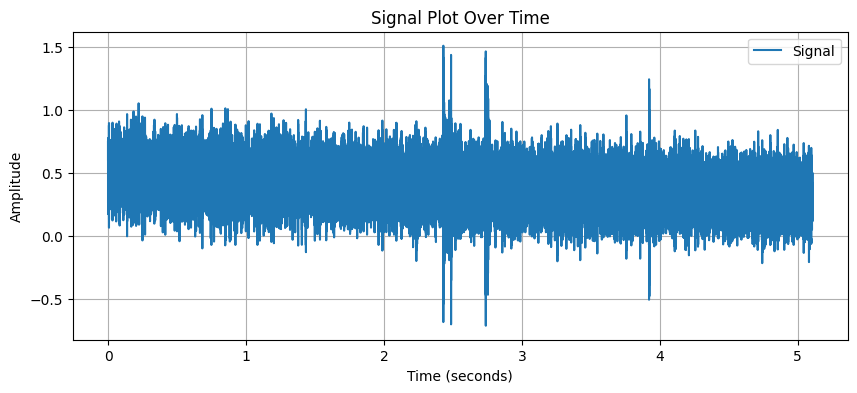

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(time, data_array, label="Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Signal Plot Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ÿßŸÜÿ™ÿÆÿßÿ® ŸÜŸÇÿßÿ∑€å ⁄©Ÿá ÿØÿ± ÿ®ÿßÿ≤Ÿá 2 ÿ™ÿß 2.01 ÿ´ÿßŸÜ€åŸá Ÿáÿ≥ÿ™ŸÜÿØ
mask = (time >= 2) & (time <= 2.01)  # ÿß€åÿ¨ÿßÿØ ŸÖÿßÿ≥⁄© ŸÅ€åŸÑÿ™ÿ±
time_filtered = time[mask]  # ÿßŸÜÿ™ÿÆÿßÿ® ŸÖŸÇÿßÿØ€åÿ± ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿß€åŸÜ ÿ®ÿßÿ≤Ÿá
signal_filtered = data_array[mask]  # ÿßŸÜÿ™ÿÆÿßÿ® ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ≥€å⁄ØŸÜÿßŸÑ ÿØÿ± ÿß€åŸÜ ÿ®ÿßÿ≤Ÿá


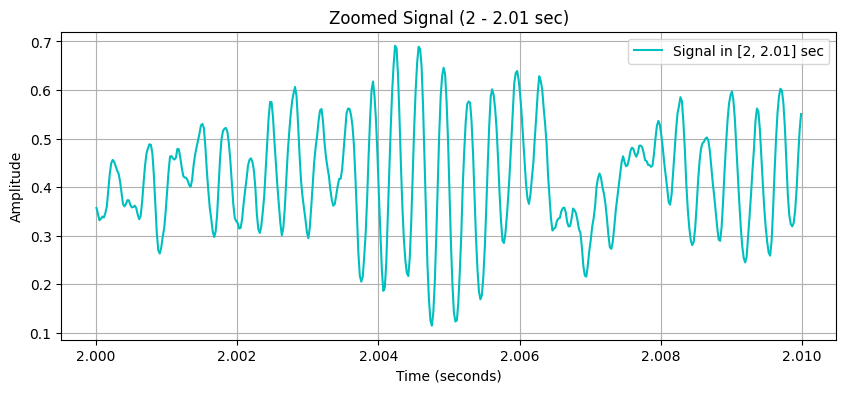

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(time_filtered, signal_filtered, label="Signal in [2, 2.01] sec", color="c")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Zoomed Signal (2 - 2.01 sec)")
plt.legend()
plt.grid(True)
plt.show()


##ÿ¨

In [ ]:
def plot_frequency_spectrum_with_dominant(signal, Fs):

    N = len(signal)  # ÿ™ÿπÿØÿßÿØ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß
    fft_values = np.fft.fft(signal)  # ŸÖÿ≠ÿßÿ≥ÿ®Ÿá FFT
    fft_magnitude = np.abs(fft_values) / N  # ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿØÿßŸÖŸÜŸá
    frequencies = np.fft.fftfreq(N, 1 / Fs)  # ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖÿ≠Ÿàÿ± ŸÅÿ±⁄©ÿßŸÜÿ≥€å

    # ŸÅŸÇÿ∑ ÿ®ÿÆÿ¥ ŸÖÿ´ÿ®ÿ™ ŸÅÿ±⁄©ÿßŸÜÿ≥‚ÄåŸáÿß ÿ±ÿß ÿØÿ± ŸÜÿ∏ÿ± ÿ®⁄Ø€åÿ±€åŸÖ
    half_N = N // 2
    frequencies = frequencies[:half_N]
    fft_magnitude = fft_magnitude[:half_N]

    # Ÿæ€åÿØÿß ⁄©ÿ±ÿØŸÜ ÿßŸÜÿØ€åÿ≥ ŸÅÿ±⁄©ÿßŸÜÿ≥ ÿ∫ÿßŸÑÿ®
    dominant_index = np.argmax(fft_magnitude)
    dominant_frequency = frequencies[dominant_index]

    # ÿ±ÿ≥ŸÖ ÿ∑€åŸÅ ŸÅÿ±⁄©ÿßŸÜÿ≥€å
    plt.figure(figsize=(8, 4))
    plt.plot(frequencies, fft_magnitude, color='c', label="Frequency Spectrum")
    plt.axvline(x=dominant_frequency, color='m', linestyle='--', label=f"Dominant Frequency: {dominant_frequency:.2f} Hz")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("Frequency Spectrum with Dominant Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"üîπ dominant: {dominant_frequency:.2f} Hz")


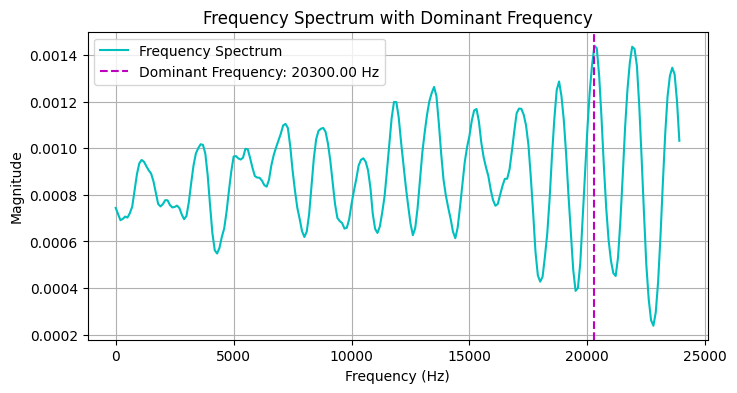

üîπ dominant: 20300.00 Hz


In [ ]:
plot_frequency_spectrum_with_dominant(signal_filtered, Fs)

##ÿØ

In [ ]:
def split_signal_with_overlap(signal, segment_size=128, overlap=32): #25% ŸáŸÖŸæŸàÿ¥ÿßŸÜ€å

    step = segment_size - overlap  # ÿßŸÜÿØÿßÿ≤Ÿá ⁄ØÿßŸÖ (ÿ®ÿß ÿ™Ÿàÿ¨Ÿá ÿ®Ÿá ŸáŸÖ‚ÄåŸæŸàÿ¥ÿßŸÜ€å)
    segments = []  # ŸÑ€åÿ≥ÿ™€å ÿ®ÿ±ÿß€å ÿ∞ÿÆ€åÿ±Ÿá ŸÇÿ∑ÿπŸá‚ÄåŸáÿß

    # ÿ™ŸÇÿ≥€åŸÖ ÿ≥€å⁄ØŸÜÿßŸÑ ÿ®Ÿá ŸÇÿ∑ÿπŸá‚ÄåŸáÿß ÿ®ÿß ŸáŸÖ‚ÄåŸæŸàÿ¥ÿßŸÜ€å
    for start_index in range(0, len(signal) - segment_size + 1, step):
        end_index = start_index + segment_size
        segment = signal[start_index:end_index]
        segments.append(segment)  # ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ŸÇÿ∑ÿπŸá ÿ®Ÿá ŸÑ€åÿ≥ÿ™

    return np.array(segments)  # ÿ™ÿ®ÿØ€åŸÑ ŸÑ€åÿ≥ÿ™ ÿ®Ÿá ÿ¢ÿ±ÿß€åŸá NumPy


In [ ]:
segments = split_signal_with_overlap(data_array, segment_size=128, overlap=32)

print(f"ÿ™ÿπÿØÿßÿØ ŸÇÿ∑ÿπŸá‚ÄåŸáÿß: {segments.shape[0]}")
print(f"ÿßÿ®ÿπÿßÿØ Ÿáÿ± ŸÇÿ∑ÿπŸá: {segments.shape[1]}")
print(segments)  # ŸÜŸÖÿß€åÿ¥ ŸÇÿ∑ÿπŸá‚ÄåŸáÿß


ÿ™ÿπÿØÿßÿØ ŸÇÿ∑ÿπŸá‚ÄåŸáÿß: 2553
ÿßÿ®ÿπÿßÿØ Ÿáÿ± ŸÇÿ∑ÿπŸá: 128
[[[0.60915692]
  [0.67591385]
  [0.73098831]
  ...
  [0.43266831]
  [0.39741231]
  [0.39177969]]

 [[0.44852308]
  [0.54615508]
  [0.63606831]
  ...
  [0.48982892]
  [0.44455938]
  [0.41535323]]

 [[0.48252738]
  [0.41431015]
  [0.36632862]
  ...
  [0.56931138]
  [0.46124862]
  [0.34296369]]

 ...

 [[0.37112677]
  [0.40638277]
  [0.41827385]
  ...
  [0.38426954]
  [0.36319938]
  [0.30562154]]

 [[0.414936  ]
  [0.41013785]
  [0.39198831]
  ...
  [0.344424  ]
  [0.32877785]
  [0.32210215]]

 [[0.32314523]
  [0.32210215]
  [0.32460554]
  ...
  [0.387816  ]
  [0.36257354]
  [0.33566215]]]


##Ÿá

In [ ]:
segments_2d = np.squeeze(segments)
df = pd.DataFrame(segments_2d)  # ÿ™ÿ®ÿØ€åŸÑ ÿ¢ÿ±ÿß€åŸá ÿ®Ÿá DataFrame
df


0         1         2         3         4         5         6    \
0     0.609157  0.675914  0.730988  0.755605  0.736204  0.676748  0.600186   
1     0.448523  0.546155  0.636068  0.713047  0.765618  0.780639  0.767287   
2     0.482527  0.414310  0.366329  0.364868  0.394909  0.447063  0.510273   
3     0.456033  0.426410  0.394074  0.379889  0.387190  0.432877  0.490872   
4     0.515697  0.468133  0.428913  0.388650  0.362782  0.350057  0.358818   
...        ...       ...       ...       ...       ...       ...       ...   
2548  0.069886  0.063836  0.080526  0.130176  0.195055  0.253676  0.327109   
2549  0.644830  0.632730  0.597892  0.529257  0.441847  0.349431  0.260561   
2550  0.371127  0.406383  0.418274  0.427453  0.416188  0.380306  0.330447   
2551  0.414936  0.410138  0.391988  0.367372  0.341921  0.325440  0.304996   
2552  0.323145  0.322102  0.324606  0.316261  0.305622  0.303953  0.323562   

           7         8         9    ...       118       119       120  \
0     0.512568  0.427662  0.357984  ...  0.718889  0.715968  0.682798   
1     0.725982  0.678000  0.614164  ...  0.530718  0.587461  0.609366   
2     0.569937  0.625846  0.678417  ...  0.502346  0.590382  0.659016   
3     0.541148  0.581411  0.600812  ...  0.538436  0.505684  0.475643   
4     0.391154  0.422446  0.442890  ...  0.616041  0.539688  0.449775   
...        ...       ...       ...  ...       ...       ...       ...   
2548  0.388859  0.448523  0.496922  ...  0.362991  0.343798  0.321268   
2549  0.198810  0.170230  0.171899  ...  0.375925  0.328569  0.273912   
2550  0.247209  0.186294  0.146865  ...  0.341503  0.358818  0.381349   
2551  0.284760  0.255554  0.235735  ...  0.302910  0.328152  0.362365   
2552  0.355272  0.383435  0.405340  ...  0.251382  0.308751  0.364868   

           121       122       123       124       125       126       127  
0     0.642118  0.595388  0.541357  0.486074  0.432668  0.397412  0.391780  
1     0.603524  0.587252  0.570354  0.535516  0.489829  0.444559  0.415353  
2     0.702408  0.714299  0.693020  0.645665  0.569311  0.461249  0.342964  
3     0.455199  0.436841  0.416188  0.424532  0.456242  0.507978  0.565348  
4     0.380932  0.323354  0.288515  0.291644  0.328152  0.407426  0.502137  
...        ...       ...       ...       ...       ...       ...       ...  
2548  0.315009  0.309585  0.302284  0.290810  0.259726  0.239282  0.230729  
2549  0.238447  0.230103  0.239908  0.264733  0.288932  0.307916  0.337331  
2550  0.398664  0.397830  0.403671  0.394700  0.384270  0.363199  0.305622  
2551  0.375925  0.384270  0.374465  0.354438  0.344424  0.328778  0.322102  
2552  0.415979  0.445811  0.442056  0.421403  0.387816  0.362574  0.335662  

[2553 rows x 128 columns]

<ipython-input-18-98973cd46b08>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", num_segments)  # ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿ±ŸÜ⁄Ø‚ÄåŸáÿß€å ÿ¢ŸÖÿßÿØŸá


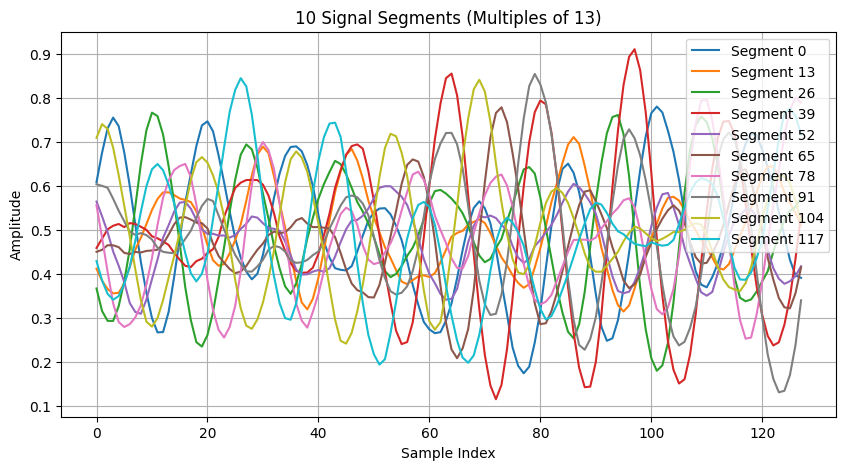

In [ ]:
df = pd.DataFrame(segments_2d)  # ÿ™ÿ®ÿØ€åŸÑ ÿ¢ÿ±ÿß€åŸá ÿ®Ÿá DataFrame

# ÿßŸÜÿ™ÿÆÿßÿ® €±€∞ ÿ±ÿØ€åŸÅ ⁄©Ÿá ÿ¥ŸÖÿßÿ±Ÿá‚Äå€å ÿ¢ŸÜ‚ÄåŸáÿß ŸÖÿ∂ÿ±ÿ® €±€≥ ÿßÿ≥ÿ™
num_segments = 10
indices = range(0, num_segments * 13, 13)   # 10 ŸÖÿ∂ÿ±ÿ® 13 ÿßŸàŸÑ: [0, 13, 26, ..., 117]

# ÿ±ŸÜ⁄Ø‚ÄåŸáÿß€å ŸÖÿÆÿ™ŸÑŸÅ ÿ®ÿ±ÿß€å ŸÜŸÖÿß€åÿ¥ ŸÜŸÖŸàÿØÿßÿ±Ÿáÿß
colors = plt.cm.get_cmap("tab10", num_segments)  # ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿ±ŸÜ⁄Ø‚ÄåŸáÿß€å ÿ¢ŸÖÿßÿØŸá

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ±
plt.figure(figsize=(10, 5))  # ÿ™ŸÜÿ∏€åŸÖ ÿßŸÜÿØÿßÿ≤Ÿá‚Äå€å ŸÜŸÖŸàÿØÿßÿ±
for i, idx in enumerate(indices):
    plt.plot(df.columns, df.iloc[idx], label=f"Segment {idx}", color=colors(i)) # iloc[i]= ÿ≥ÿ∑ÿ± iÿßŸÖ

plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("10 Signal Segments (Multiples of 13)")
plt.legend()  # ŸÜŸÖÿß€åÿ¥ ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß
plt.grid(True)
plt.show()


##Ÿà

In [ ]:
def mean_StandardDeviation_RMS(signal):
    mean = np.mean(signal)
    StandardDeviation = np.std(signal)
    RMS = np.sqrt(np.mean(np.square(signal)))

    return mean, StandardDeviation, RMS


In [ ]:
mean, StandardDeviation, RMS = mean_StandardDeviation_RMS(data_array)
print(f"Mean: {mean}, Standard Deviation: {StandardDeviation}, RMS: {RMS}")

Mean: 0.3960536227712893, Standard Deviation: 0.15106174935419478, RMS: 0.4238845647440022


In [ ]:
# ÿß€åÿ¨ÿßÿØ DataFrame ÿ®ÿß ŸÜÿßŸÖ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß
df = pd.DataFrame({
    "Mean": [float(mean)],
    "Std_Dev": [float(StandardDeviation)],
    "RMS": [float(RMS)]
})

#print(df)


In [ ]:
# ÿ∞ÿÆ€åÿ±Ÿá DataFrame ÿØÿ± ŸÅÿß€åŸÑ CSV
df.to_csv("output.csv", index=False)


In [ ]:
#from google.colab import files
#files.download("/content/output.csv")


#II

##ÿ¢

In [ ]:
# €±. ÿ®ÿßÿ±⁄Ø€åÿ±€å ŸÖÿ¨ŸÖŸàÿπŸá ÿØÿßÿØŸá Iris
iris = load_iris()

# €≤. ÿ™ŸÇÿ≥€åŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿ¢ŸÖŸàÿ≤ÿ¥ (€∏€∞Ÿ™) Ÿà ÿ¢ÿ≤ŸÖŸàŸÜ (€≤€∞Ÿ™)
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=63
)

# €≥. ÿØÿ±€åÿßŸÅÿ™ ŸÜÿßŸÖ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß
columns = iris.feature_names

# €¥. ÿß€åÿ¨ÿßÿØ DataFrame ÿ®ÿ±ÿß€å ŸÖÿ¨ŸÖŸàÿπŸá ÿ¢ŸÖŸàÿ≤ÿ¥
df_train = pd.DataFrame(X_train, columns=columns)
df_train["species"] = y_train  # ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ⁄©ŸÑÿßÿ≥
df_train["dataset_type"] = "train"  # ŸÖÿ¥ÿÆÿµ ⁄©ÿ±ÿØŸÜ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥

# €µ. ÿß€åÿ¨ÿßÿØ DataFrame ÿ®ÿ±ÿß€å ŸÖÿ¨ŸÖŸàÿπŸá ÿ¢ÿ≤ŸÖŸàŸÜ
df_test = pd.DataFrame(X_test, columns=columns)
df_test["species"] = y_test  # ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ⁄©ŸÑÿßÿ≥
df_test["dataset_type"] = "test"  # ŸÖÿ¥ÿÆÿµ ⁄©ÿ±ÿØŸÜ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ¢ÿ≤ŸÖŸàŸÜ

# €∂. ÿßÿØÿ∫ÿßŸÖ ÿØŸà DataFrame
df_final = pd.concat([df_train, df_test], ignore_index=True)

# €∑. ŸÜŸÖÿß€åÿ¥ €±€∞ ŸÜŸÖŸàŸÜŸá ÿßŸàŸÑ ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÜŸáÿß€å€å
print(df_final.head(150))


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  4.7               3.2                1.3               0.2   
1                  6.4               2.8                5.6               2.2   
2                  6.7               3.1                4.7               1.5   
3                  5.6               2.7                4.2               1.3   
4                  4.9               2.5                4.5               1.7   
..                 ...               ...                ...               ...   
145                4.8               3.4                1.6               0.2   
146                7.2               3.0                5.8               1.6   
147                6.2               2.8                4.8               1.8   
148                6.7               2.5                5.8               1.8   
149                5.7               2.9                4.2               1.3   

     species dataset_type  

##ÿ®

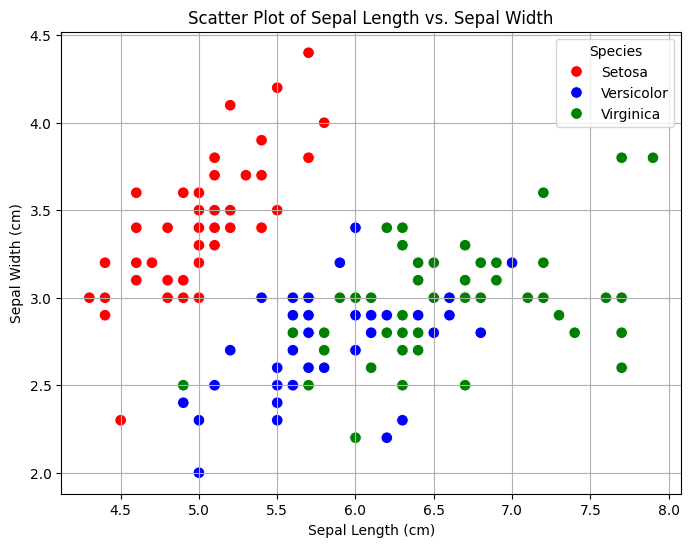

In [ ]:
# €±. ÿ®ÿßÿ±⁄Ø€åÿ±€å ŸÖÿ¨ŸÖŸàÿπŸá ÿØÿßÿØŸá Iris
iris = load_iris()

# €≤. ÿ™ÿ®ÿØ€åŸÑ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target  # ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ⁄©ŸÑÿßÿ≥
df["species"] = df["species"].map({0: "Setosa", 1: "Versicolor", 2: "Virginica"})  # ŸÜÿßŸÖ⁄Øÿ∞ÿßÿ±€å ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß

# €≥. ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± Ÿæÿ±ÿß⁄©ŸÜÿØ⁄Ø€å (Scatter Plot)
plt.figure(figsize=(8, 6))  # ÿ™ŸÜÿ∏€åŸÖ ÿßŸÜÿØÿßÿ≤Ÿá ŸÜŸÖŸàÿØÿßÿ±
sns.scatterplot(
    x=df["sepal length (cm)"],
    y=df["sepal width (cm)"],
    hue=df["species"],  # ÿ™ŸÅ⁄©€å⁄© ÿ±ŸÜ⁄Ø‚ÄåŸáÿß ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÜŸàÿπ ⁄ØŸÑ
    palette=["red", "blue", "green"],  # ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß
    s=70  # ÿ™ŸÜÿ∏€åŸÖ ÿßŸÜÿØÿßÿ≤Ÿá ŸÜŸÇÿßÿ∑
)

# €¥. ÿ™ŸÜÿ∏€åŸÖÿßÿ™ ŸÜŸÖŸàÿØÿßÿ±
plt.xlabel("Sepal Length (cm)")  # ÿ®ÿ±⁄Üÿ≥ÿ® ŸÖÿ≠Ÿàÿ± x
plt.ylabel("Sepal Width (cm)")  # ÿ®ÿ±⁄Üÿ≥ÿ® ŸÖÿ≠Ÿàÿ± y
plt.title("Scatter Plot of Sepal Length vs. Sepal Width")  # ÿπŸÜŸàÿßŸÜ ŸÜŸÖŸàÿØÿßÿ±
plt.legend(title="Species")  # ŸÜŸÖÿß€åÿ¥ ÿ±ÿßŸáŸÜŸÖÿß€å ÿ±ŸÜ⁄Ø‚ÄåŸáÿß
plt.grid(True)  # ÿßŸÅÿ≤ŸàÿØŸÜ ÿÆÿ∑Ÿàÿ∑ ÿ¥ÿ®⁄©Ÿá

# €µ. ŸÜŸÖÿß€åÿ¥ ŸÜŸÖŸàÿØÿßÿ±
plt.show()


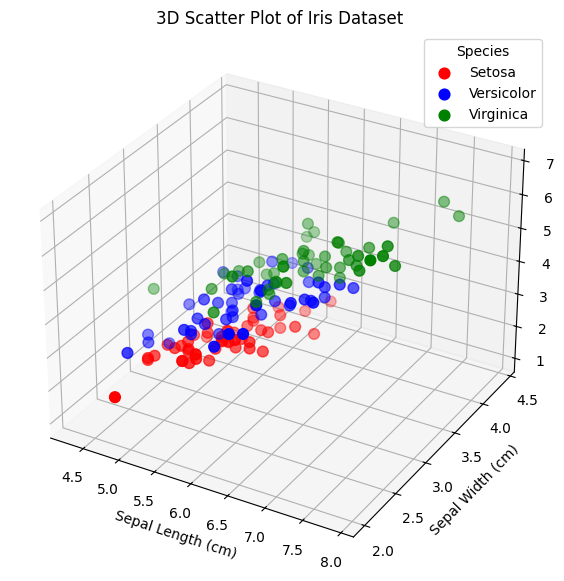

In [ ]:
# €±. ÿ®ÿßÿ±⁄Ø€åÿ±€å ŸÖÿ¨ŸÖŸàÿπŸá ÿØÿßÿØŸá Iris
iris = load_iris()

# €≤. ÿ™ÿ®ÿØ€åŸÑ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target  # ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ⁄©ŸÑÿßÿ≥
df["species"] = df["species"].map({0: "Setosa", 1: "Versicolor", 2: "Virginica"})  # ŸÜÿßŸÖ⁄Øÿ∞ÿßÿ±€å ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß

# €≥. ÿ™ÿπÿ±€åŸÅ ÿ±ŸÜ⁄Ø‚ÄåŸáÿß€å Ÿáÿ± ⁄©ŸÑÿßÿ≥
colors = {"Setosa": "red", "Versicolor": "blue", "Virginica": "green"}

# €¥. ÿß€åÿ¨ÿßÿØ ŸÜŸÖŸàÿØÿßÿ± ÿ≥Ÿá‚Äåÿ®ÿπÿØ€å
fig = plt.figure(figsize=(10, 7))  # ÿ™ŸÜÿ∏€åŸÖ ÿßŸÜÿØÿßÿ≤Ÿá ŸÜŸÖŸàÿØÿßÿ±
ax = fig.add_subplot(111, projection="3d")  # ÿßŸÅÿ≤ŸàÿØŸÜ ŸÖÿ≠Ÿàÿ± ÿ≥Ÿá‚Äåÿ®ÿπÿØ€å

# €µ. ÿ±ÿ≥ŸÖ ŸÜŸÇÿßÿ∑ ÿ®ÿ±ÿß€å Ÿáÿ± ⁄©ŸÑÿßÿ≥ ÿ®Ÿá‚ÄåÿµŸàÿ±ÿ™ ÿ¨ÿØÿß⁄ØÿßŸÜŸá
for species, color in colors.items():
    subset = df[df["species"] == species]  # ŸÅ€åŸÑÿ™ÿ± ⁄©ÿ±ÿØŸÜ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÜŸàÿπ ⁄ØŸÑ
    ax.scatter(
        subset["sepal length (cm)"],
        subset["sepal width (cm)"],
        subset["petal length (cm)"],
        label=species,
        color=color,
        s=60  # ÿ™ŸÜÿ∏€åŸÖ ÿßŸÜÿØÿßÿ≤Ÿá ŸÜŸÇÿßÿ∑
    )

# €∂. ÿ™ŸÜÿ∏€åŸÖ ÿ®ÿ±⁄Üÿ≥ÿ® ŸÖÿ≠Ÿàÿ±‚ÄåŸáÿß
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Sepal Width (cm)")
ax.set_zlabel("Petal Length (cm)")
ax.set_title("3D Scatter Plot of Iris Dataset")

# €∑. ŸÜŸÖÿß€åÿ¥ ÿ±ÿßŸáŸÜŸÖÿß€å ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß
ax.legend(title="Species")

# €∏. ŸÜŸÖÿß€åÿ¥ ŸÜŸÖŸàÿØÿßÿ±
plt.show()


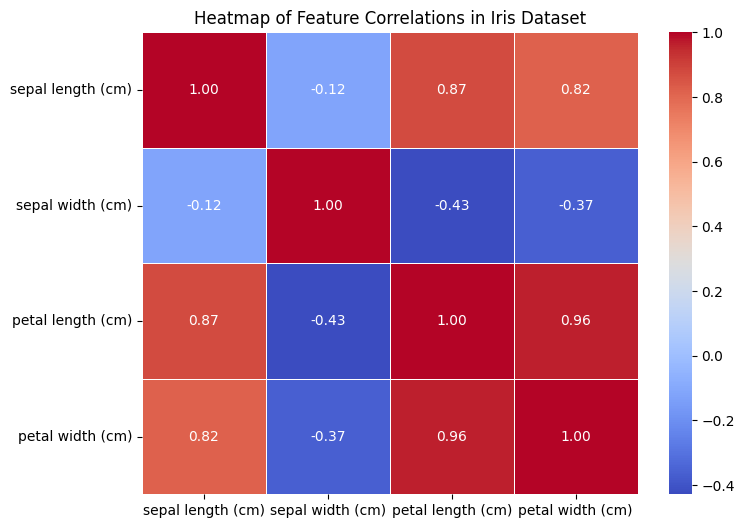

In [ ]:
# €±. ÿ®ÿßÿ±⁄Ø€åÿ±€å ŸÖÿ¨ŸÖŸàÿπŸá ÿØÿßÿØŸá Iris
iris = load_iris()

# €≤. ÿ™ÿ®ÿØ€åŸÑ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# €≥. ŸÖÿ≠ÿßÿ≥ÿ®Ÿá‚Äå€å ŸÖÿßÿ™ÿ±€åÿ≥ ŸáŸÖÿ®ÿ≥ÿ™⁄Ø€å (Correlation Matrix)
correlation_matrix = df.corr()

# €¥. ÿ±ÿ≥ŸÖ ŸÜŸÇÿ¥Ÿá‚Äå€å ÿ≠ÿ±ÿßÿ±ÿ™€å ÿ®ÿß Seaborn
plt.figure(figsize=(8, 6))  # ÿ™ŸÜÿ∏€åŸÖ ÿßŸÜÿØÿßÿ≤Ÿá ŸÜŸÖŸàÿØÿßÿ±
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# €µ. ÿ™ŸÜÿ∏€åŸÖÿßÿ™ ŸÜŸÖŸàÿØÿßÿ±
plt.title("Heatmap of Feature Correlations in Iris Dataset")  # ÿπŸÜŸàÿßŸÜ ŸÜŸÖŸàÿØÿßÿ±

# €∂. ŸÜŸÖÿß€åÿ¥ ŸÜŸÇÿ¥Ÿá‚Äå€å ÿ≠ÿ±ÿßÿ±ÿ™€å
plt.show()


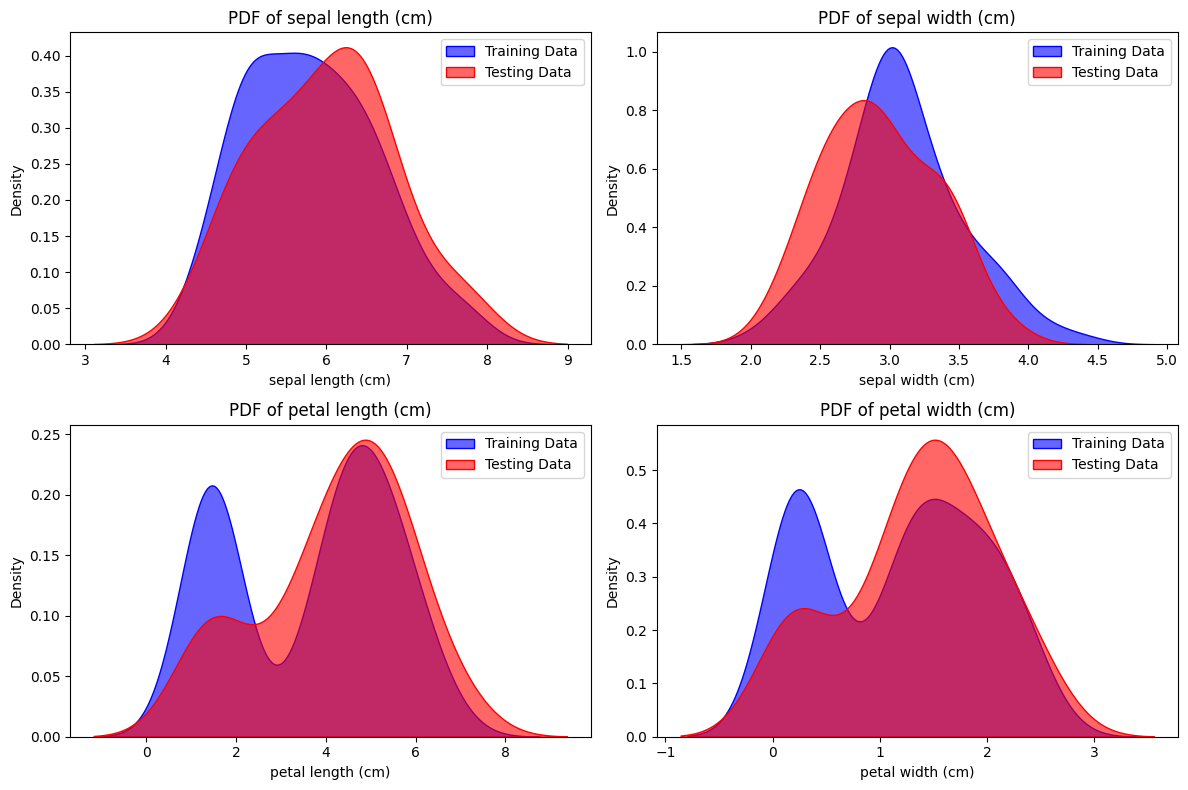

In [ ]:
# 1. Load the Iris dataset
iris = load_iris()

# 2. Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target  # Add species column

# 3. Split the dataset into training (80%) and testing (20%) sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=63)

# 4. Plot the probability density function (PDF) for each feature
plt.figure(figsize=(12, 8))  # Set the figure size

for i, feature in enumerate(df.columns[:-1]):  # Exclude the 'species' column
    plt.subplot(2, 2, i + 1)  # Create subplots (2 rows, 2 columns)

    # Plot training data distribution
    sns.kdeplot(train_df[feature], label="Training Data", fill=True, alpha=0.6, color="blue")

    # Plot testing data distribution
    sns.kdeplot(test_df[feature], label="Testing Data", fill=True, alpha=0.6, color="red")

    # Set titles and labels
    plt.title(f"PDF of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()

# 5. Display the plots
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


##ÿ¨

In [ ]:
# 1. Load the Iris dataset
iris = load_iris()

# 2. Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 3. Select a numerical feature (sepal length) and discretize it into 3 categories
df["sepal_length_category"] = pd.cut(
    df["sepal length (cm)"],  # The continuous feature
    bins=3,  # Divide into 3 bins
    labels=["Short", "Medium", "Tall"]  # Assign labels to each bin
)

# 4. Display the first few rows to check the new column
print(df[["sepal length (cm)", "sepal_length_category"]].head())


   sepal length (cm) sepal_length_category
0                5.1                 Short
1                4.9                 Short
2                4.7                 Short
3                4.6                 Short
4                5.0                 Short


##ÿØ

In [ ]:
# 1. Load the Iris dataset
iris = load_iris()

# 2. Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target  # Add species column
df["species"] = df["species"].map({0: "Setosa", 1: "Versicolor", 2: "Virginica"})  # Map target values to class names

# 3. Filter only the Setosa class
setosa_df = df[df["species"] == "Setosa"]

# 4. Get statistical description of the Setosa class
setosa_stats = setosa_df.describe()

# 5. Display the result
print(setosa_stats)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count         50.000000  
mean           0.246000  
std            0.105386  
min            0.100000  
25%            0.200000  
50%            0.200000  
75%            0.300000  
max            0.600000  
